In [34]:
import main_LSTM as LSTM

In [7]:
import matplotlib.pyplot as plt

In [28]:
from keras.models import load_model

In [3]:
SAVE_dir = "./RESULT/tmp"
def make_date():
    '''
    人工データの作成。
    '''
    # test
    time = 15
    row = 80
    col = 80
    filters = 1
    training = 1200
    train = np.zeros((training, time, row, col, 1), dtype=np.float)
    gt = np.zeros((training, time, row, col, 1), dtype=np.float)
    # for i in range(1000):
    #    gt[::,0,0,0] = np.random.random()

    for i in range(training):
        n = np.random.randint(3, 8)
        # n=15
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            directionx = np.random.randint(0, 3) - 1
            gravity = 0  # np.random.randint(0,3) - 1
            w = np.random.randint(2, 4)
            # rint directionx,directiony
            for t in range(time):
                # w = 2
                train[i, t, xstart + directionx * t - w:xstart + directionx * t + w,
                      ystart + directiony * t + int(0.1 * gravity * t**2) - w:ystart + directiony * t + int(0.1 * gravity * t**2) + w, 0] += 1

                # Make it more robust
                # Noise
                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w - 1:xstart + directionx * t + w + 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) - w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w + 1, 0] += 0.1

                if np.random.randint(0, 2):
                    train[i, t, xstart + directionx * t - w + 1:xstart + directionx * t + w - 1,
                          ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1:ystart + directiony * t + int(0.1 * gravity * t**2) + w - 1, 0] -= 0.1

                gt[i, t, xstart + directionx * (t + 1) - w:xstart + directionx * (t + 1) + w,
                   ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) - w:ystart + directiony * (t + 1) + int(0.1 * gravity * (t + 1)**2) + w, 0] += 1

    train = train[::, ::, 20:60, 20:60, ::]
    gt = gt[::, ::, 20:60, 20:60, ::]
    train[train >= 1] = 1
    gt[gt >= 1] = 1
    return train, gt

In [151]:
train, gt = make_date()

(1200, 15, 40, 40, 1)


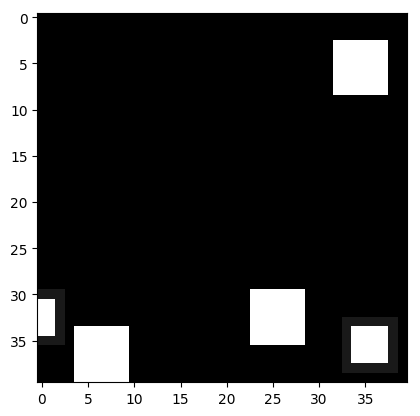

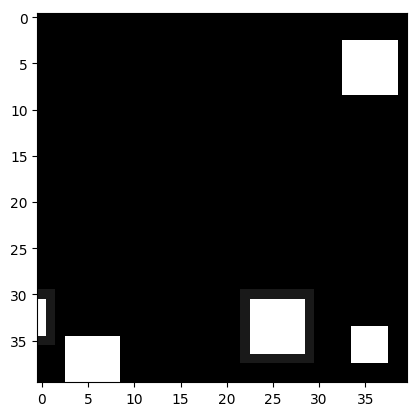

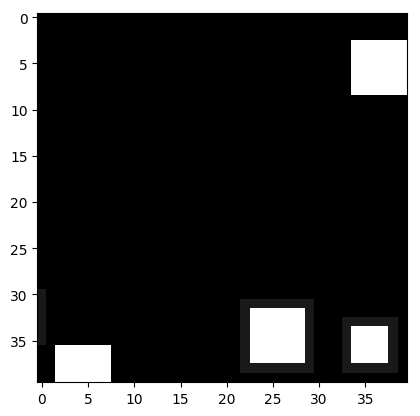

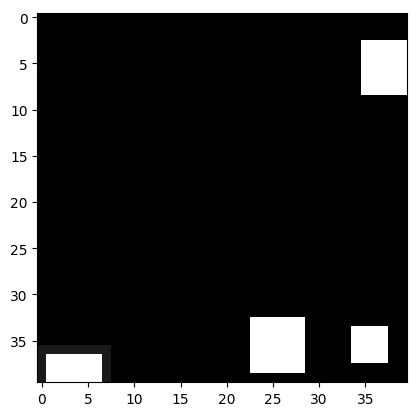

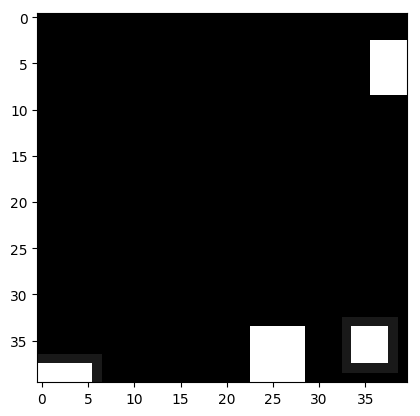

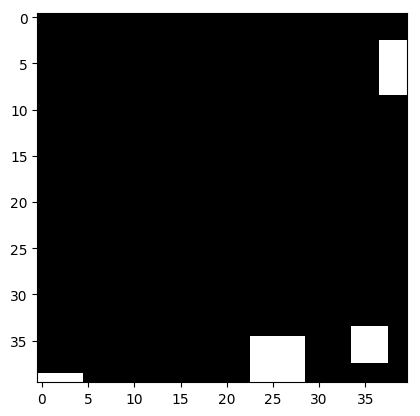

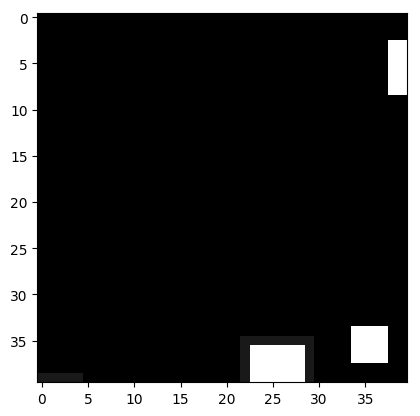

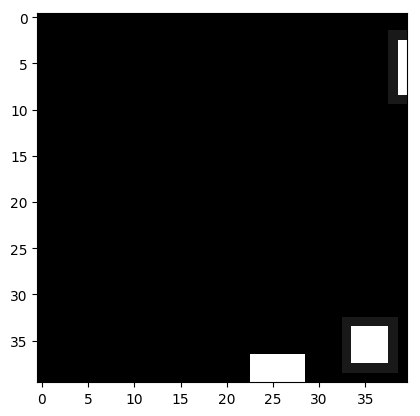

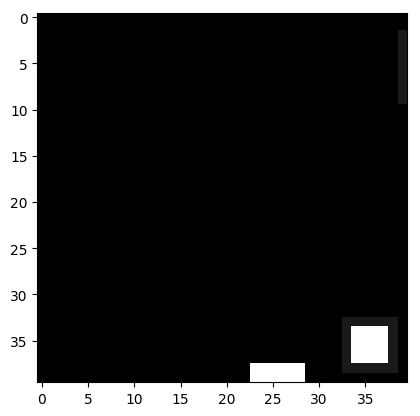

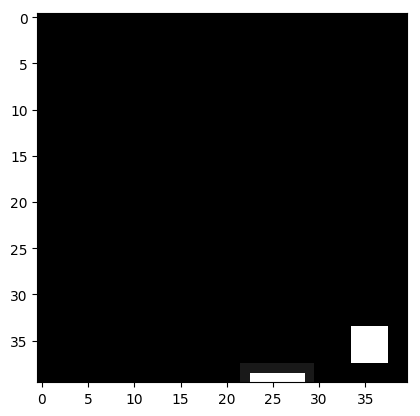

In [20]:
print(train.shape)

plt.clf()
for i in range(10):
    tmp = train[0, i, :, :, 0]
    plt.figure()
    plt.imshow(tmp, cmap="gray", interpolation="none")
    plt.show()

In [145]:
model = "./RESULT/test_失敗/LSTM_test_2017_10_27/model_test_set.h5"
model = load_model(model)
img_test = train[1004]

In [36]:
plt.clf()

In [165]:
import imp
imp.reload(LSTM)

<module 'main_LSTM' from '/Users/yukiota/solar_project/solar_LSTM/main_LSTM.py'>

In [62]:
border = np.ones((tmp.shape[0], 10))
tmp2 = np.concatenate((tmp, border, tmp), axis=1)
tmp2 = tmp2.repeat(5, axis=0).repeat(5, axis=1)

plt.clf()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.imshow(tmp, cmap="gray", interpolation="none")
ax.text(37, 3, "Initial Time", color="white", fontdict={"fontsize": 15,"fontweight":'bold',"ha":"right","va":"center"})
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(122)
ax.text(37, 3, "Ground Truth", color="white", fontdict={"fontsize": 15,"fontweight":'bold',"ha":"right","va":"center"})
ax.imshow(tmp, cmap="gray", interpolation="none")
plt.xticks([])
plt.yticks([])

plt.savefig("testes.png", cmap="gray", interpolation="none")

In [163]:
plt.show()

In [142]:
print(img_test.shape)
new_pos =model.predict(img_test[np.newaxis, :10, :, :, :])
print(img_test[np.newaxis, :10, :, :, :].shape)
print(new_pos.shape)
# new_pos[0, -1, :, :, :]

(15, 40, 40, 1)
(1, 10, 40, 40, 1)
(1, 10, 40, 40, 1)


In [166]:
plt.clf()
LSTM.predict_convLSTM2D(model, img_test, SAVE_dir, date="test", start=0)

start predicting from 0 to 10
(10, 40, 40, 1) (40, 40, 1)
(11, 40, 40, 1) (40, 40, 1)
(12, 40, 40, 1) (40, 40, 1)
(13, 40, 40, 1) (40, 40, 1)
(14, 40, 40, 1) (40, 40, 1)
(15, 40, 40, 1) (40, 40, 1)
(16, 40, 40, 1) (40, 40, 1)
(17, 40, 40, 1) (40, 40, 1)
(18, 40, 40, 1) (40, 40, 1)
(19, 40, 40, 1) (40, 40, 1)
(20, 40, 40, 1) (40, 40, 1)
(21, 40, 40, 1) (40, 40, 1)
(22, 40, 40, 1) (40, 40, 1)
(23, 40, 40, 1) (40, 40, 1)
(24, 40, 40, 1) (40, 40, 1)
(25, 40, 40, 1) (40, 40, 1)


/Users/yukiota/.pyenv/versions/anaconda3-4.4.0/envs/local_py3_cv/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [173]:
tmp = img_test[:10:] - img_test[:10]
tmp.mean()

0.0